<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Time-&amp;-Date" data-toc-modified-id="Time-&amp;-Date-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Time &amp; Date</a></span></li><li><span><a href="#Lab-|-Predicting-Claim-Amount-with-ML-Linear-Regression" data-toc-modified-id="Lab-|-Predicting-Claim-Amount-with-ML-Linear-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lab | Predicting Claim Amount with ML Linear Regression</a></span></li></ul></div>

# Time & Date

In [1]:
import pandas as pd
import numpy as np

In [2]:
import time
from datetime import date

<b>Show the dataframe shape

In [3]:
df=pd.read_excel("marketing_customer_analysis.xlsx")
df.shape

(10910, 26)

In [4]:
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0.0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9.0,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1.0,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1.0,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2.0,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2.0,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3.0,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2.0,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4.0,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7.0,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905.0,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,NaN,7.0,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906.0,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6.0,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907.0,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2.0,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908.0,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.0,6.0,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [5]:
columns=df.columns
columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

<b>Standardize header names

In [6]:
df.columns = map(str.lower, df.columns)

In [7]:
df.columns = df.columns.str.replace(' ','_')

In [8]:
df.drop(df.columns[0], axis=1, inplace=True)

In [9]:
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029.0,...,0.0,9.0,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0.0,...,0.0,1.0,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139.0,...,0.0,2.0,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078.0,...,0.0,2.0,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675.0,...,NaN,7.0,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0.0,...,NaN,7.0,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146.0,...,0.0,6.0,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837.0,...,0.0,2.0,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195.0,...,4.0,6.0,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


<b>Numerical Columns

In [10]:
Numeric = df.select_dtypes(include='number')
Numeric

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029.0,61.0,7.0,52.0,0.0,9.0,292.800000
1,2228.525238,0.0,64.0,3.0,26.0,0.0,1.0,744.924331
2,14947.917300,22139.0,100.0,34.0,31.0,0.0,2.0,480.000000
3,22332.439460,49078.0,97.0,10.0,3.0,0.0,2.0,484.013411
4,9025.067525,23675.0,117.0,NaN,31.0,NaN,7.0,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0.0,253.0,NaN,40.0,NaN,7.0,1214.400000
10906,5259.444853,61146.0,65.0,7.0,68.0,0.0,6.0,273.018929
10907,23893.304100,39837.0,201.0,11.0,63.0,0.0,2.0,381.306996
10908,11971.977650,64195.0,158.0,0.0,27.0,4.0,6.0,618.288849


<b>Categorical Columns

In [11]:
Categoric = df.select_dtypes(include=['object'])
Categoric

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


<b>Checking i for existance of NAN

In [12]:
df.isnull().values.any()

True

<b>How many of NAN

In [13]:
df.isna().sum().sum()

9254

<b>Replacing NAN with Unknown

<b>Extract the months from the dataset and store in a separate column

In [14]:
df['month']= pd.DatetimeIndex(df["effective_to_date"]).month
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029.0,...,9.0,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0.0,...,1.0,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139.0,...,2.0,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078.0,...,2.0,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675.0,...,7.0,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0.0,...,7.0,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146.0,...,6.0,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837.0,...,2.0,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195.0,...,6.0,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


<b>Information for the first quarter

In [15]:
filtered=df.query('0< month <4')
filtered

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029.0,...,9.0,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0.0,...,1.0,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139.0,...,2.0,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078.0,...,2.0,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675.0,...,7.0,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0.0,...,7.0,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146.0,...,6.0,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837.0,...,2.0,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195.0,...,6.0,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


<b>Show DataFrame info

In [16]:
df.info
    

<bound method DataFrame.info of       customer       state  customer_lifetime_value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877         NaN              6857.519928      NaN     Basic   

      education effective_to_date employmentstatus gender   income  ...  \
0   

<b>Describe DataFrame

In [17]:
df.describe

<bound method NDFrame.describe of       customer       state  customer_lifetime_value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877         NaN              6857.519928      NaN     Basic   

      education effective_to_date employmentstatus gender   income  ...  \
0 

<b>Show a plot of the total number of responses (for each response type - "Yes"/"No").

<AxesSubplot:>

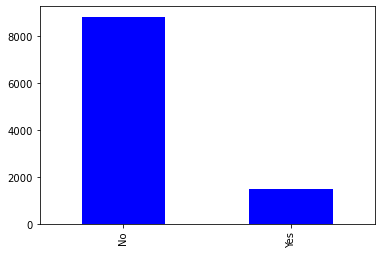

In [18]:
df["response"].value_counts().plot(kind="bar",color="Blue")

<b>Show a plot of the rate of the response types by each Sales Channel

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

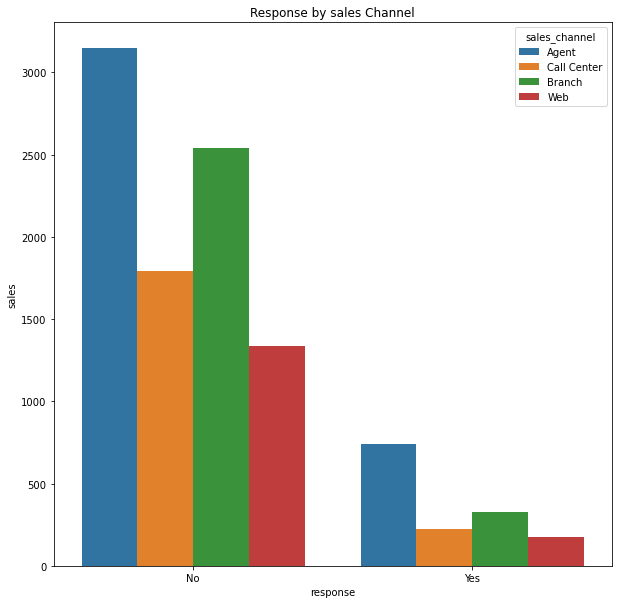

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x="response", hue= "sales_channel", data=df)
plt.ylabel("sales")
plt.title("Response by sales Channel")
plt.show()

<b>Show a plot of the distribution of the Total Claim Amount, broken down by response type. Try a boxplot and distribution plot, for each response type

<AxesSubplot:title={'center':'total_claim_amount'}, xlabel='response'>

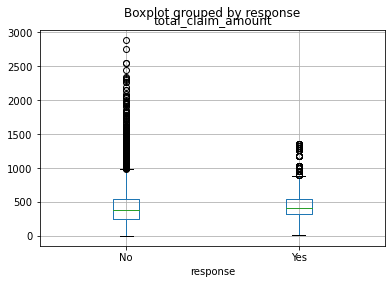

In [21]:
df.boxplot(by ='response', column =['total_claim_amount']) 

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

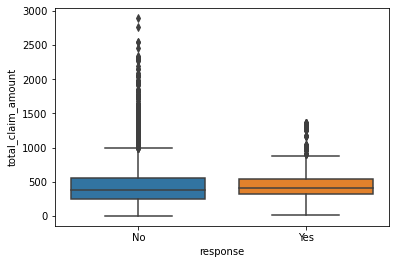

In [22]:
sns.boxplot(x ='response', y="total_claim_amount", data=df)

<b>For the distribution plot, try to plot both kinds of responses in one chart (seaborn's histplot, using the 'hue' parameter is very convenient here)

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

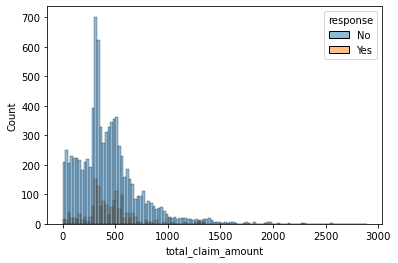

In [23]:
sns.histplot(df, x="total_claim_amount", hue="response")

<b>Create similar plots like in the task before, but for Income

<AxesSubplot:xlabel='income', ylabel='Count'>

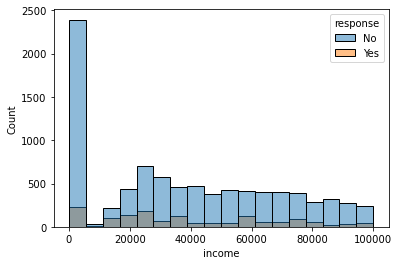

In [24]:
sns.histplot(df, x="income", hue="response")

<AxesSubplot:xlabel='total_claim_amount', ylabel='income'>

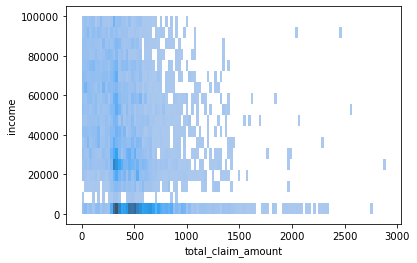

In [25]:
sns.histplot(df, x="total_claim_amount", y="income")

<b>Create a scatterplot between Total Claim Amount and Income

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

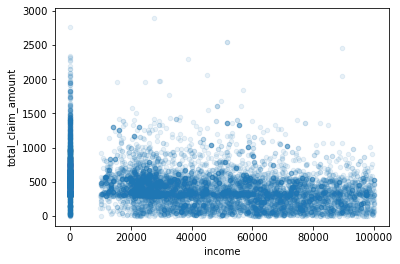

In [26]:
df.plot.scatter(x='income',y='total_claim_amount',colormap='viridis', alpha=0.1)

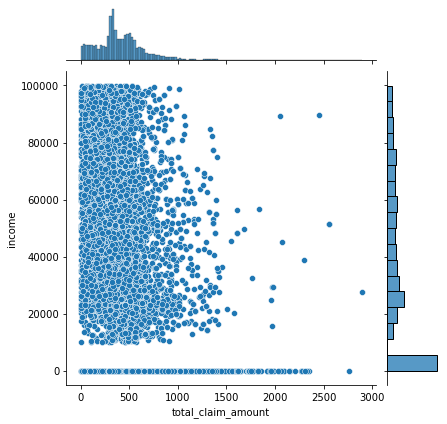

In [27]:
sns.jointplot(x=df['total_claim_amount'], y=df['income'])

<b>Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [28]:
df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                  float64
location_code                            object
marital_status                           object
monthly_premium_auto                    float64
months_since_last_claim                 float64
months_since_policy_inception           float64
number_of_open_complaints               float64
number_of_policies                      float64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [29]:
Numerical = df.select_dtypes(include='number')
Numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029.0,61.0,7.0,52.0,0.0,9.0,292.800000,2
1,2228.525238,0.0,64.0,3.0,26.0,0.0,1.0,744.924331,1
2,14947.917300,22139.0,100.0,34.0,31.0,0.0,2.0,480.000000,2
3,22332.439460,49078.0,97.0,10.0,3.0,0.0,2.0,484.013411,1
4,9025.067525,23675.0,117.0,NaN,31.0,NaN,7.0,707.925645,1
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0.0,253.0,NaN,40.0,NaN,7.0,1214.400000,1
10906,5259.444853,61146.0,65.0,7.0,68.0,0.0,6.0,273.018929,1
10907,23893.304100,39837.0,201.0,11.0,63.0,0.0,2.0,381.306996,2
10908,11971.977650,64195.0,158.0,0.0,27.0,4.0,6.0,618.288849,2


In [30]:
Categorical = df.select_dtypes(include='object')
Categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


<b>Now we will try to check the normality of the numerical variables visually
    
-Use seaborn library to construct distribution plots for the numerical variables
    
-Use Matplotlib to construct histograms
    
-Do the distributions for different numerical variables look like a normal distribution

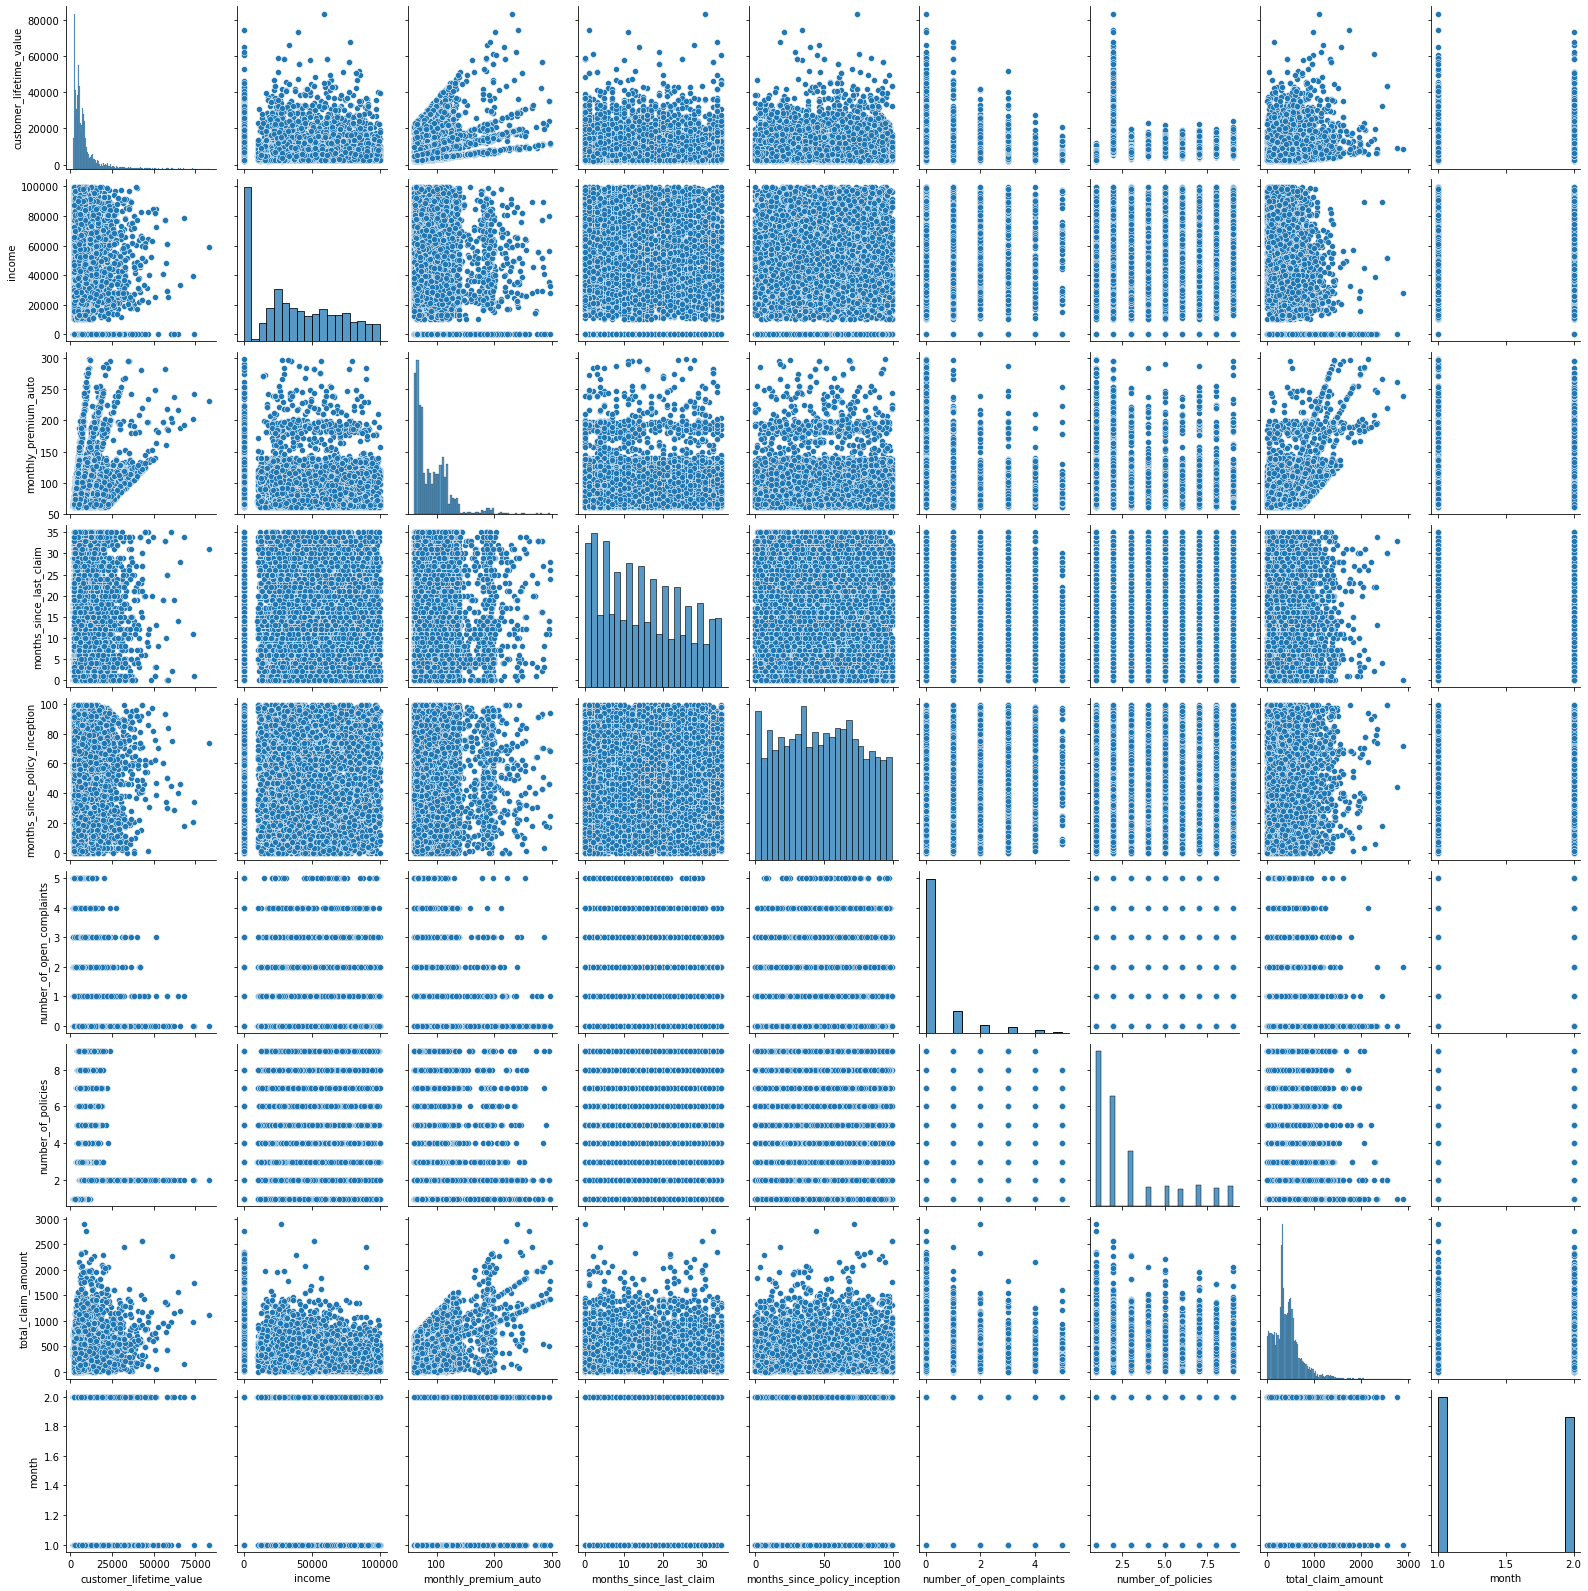

In [31]:
sns.pairplot(Numerical)

In [32]:
import matplotlib.pyplot as plt

<b>For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable

In [33]:
corr_data = Numerical
correlations_matrix = corr_data.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
customer_lifetime_value,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626,-0.009234
income,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141,-0.000443
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799,0.007253
months_since_last_claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137,-0.019951
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095,0.015163
number_of_open_complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379,-0.004813
number_of_policies,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923,0.005127
total_claim_amount,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000,0.001425
month,-0.009234,-0.000443,0.007253,-0.019951,0.015163,-0.004813,0.005127,0.001425,1.000000


<AxesSubplot:>

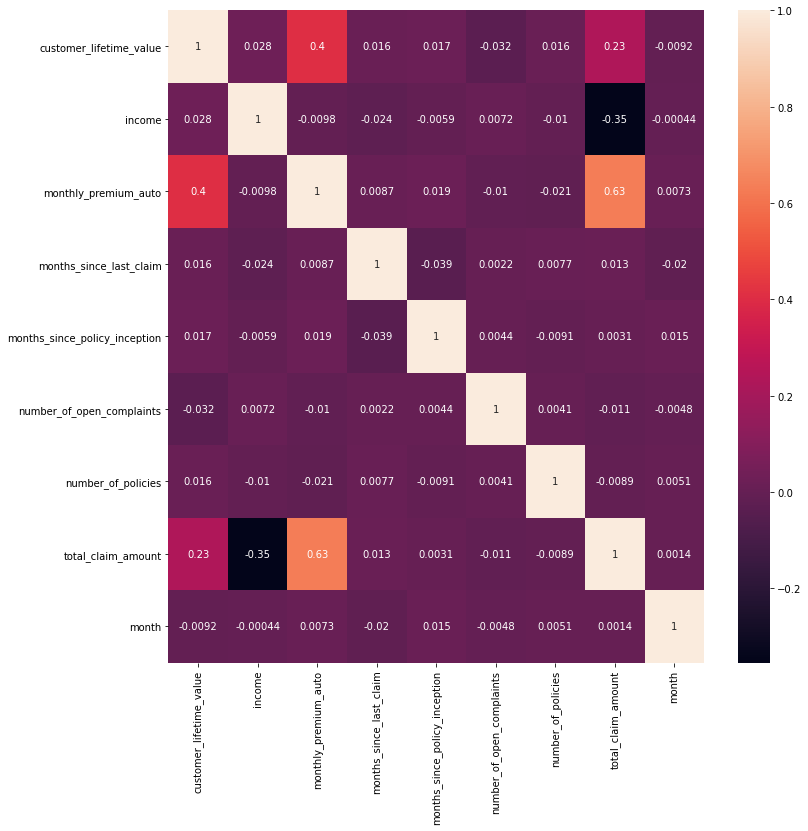

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(correlations_matrix, annot=True)


# Lab | Predicting Claim Amount with ML Linear Regression

In [35]:
#import the model from sklearn
from sklearn import linear_model
#import evaluation metrics from sklearn
from sklearn.metrics import mean_squared_error, r2_score
#import TTsplit from sklearn
from sklearn.model_selection import train_test_split 

In [36]:
df=df.dropna()

In [37]:
df.reset_index(drop=True, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4543 entries, 0 to 4542
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       4543 non-null   object        
 1   state                          4543 non-null   object        
 2   customer_lifetime_value        4543 non-null   float64       
 3   response                       4543 non-null   object        
 4   coverage                       4543 non-null   object        
 5   education                      4543 non-null   object        
 6   effective_to_date              4543 non-null   datetime64[ns]
 7   employmentstatus               4543 non-null   object        
 8   gender                         4543 non-null   object        
 9   income                         4543 non-null   float64       
 10  location_code                  4543 non-null   object        
 11  marital_status   

In [39]:
dfnum=df.select_dtypes(include=np.number)

In [40]:
dfnum

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,14947.917300,22139.0,100.0,34.0,31.0,0.0,2.0,480.000000,2
1,22332.439460,49078.0,97.0,10.0,3.0,0.0,2.0,484.013411,1
2,5154.764074,82730.0,127.0,13.0,31.0,0.0,1.0,442.521087,1
3,5454.587929,66334.0,69.0,25.0,25.0,0.0,4.0,331.200000,1
4,5326.677654,76717.0,66.0,26.0,10.0,0.0,6.0,300.528579,2
...,...,...,...,...,...,...,...,...,...
4538,3579.023825,28304.0,91.0,10.0,30.0,2.0,1.0,655.200000,1
4539,2771.663013,59855.0,74.0,30.0,82.0,4.0,1.0,355.200000,1
4540,19228.463620,0.0,187.0,14.0,32.0,0.0,2.0,897.600000,2
4541,5259.444853,61146.0,65.0,7.0,68.0,0.0,6.0,273.018929,1


In [41]:
dfcat=df.select_dtypes(include=object)

In [42]:
dfcat

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
1,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
2,HG93801,Arizona,No,Extended,High School or Below,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
3,KR82385,California,No,Basic,Master,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
4,FH51383,California,No,Basic,High School or Below,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,PP30874,California,No,Extended,High School or Below,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A
4539,SU71163,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
4540,QI63521,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
4541,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A


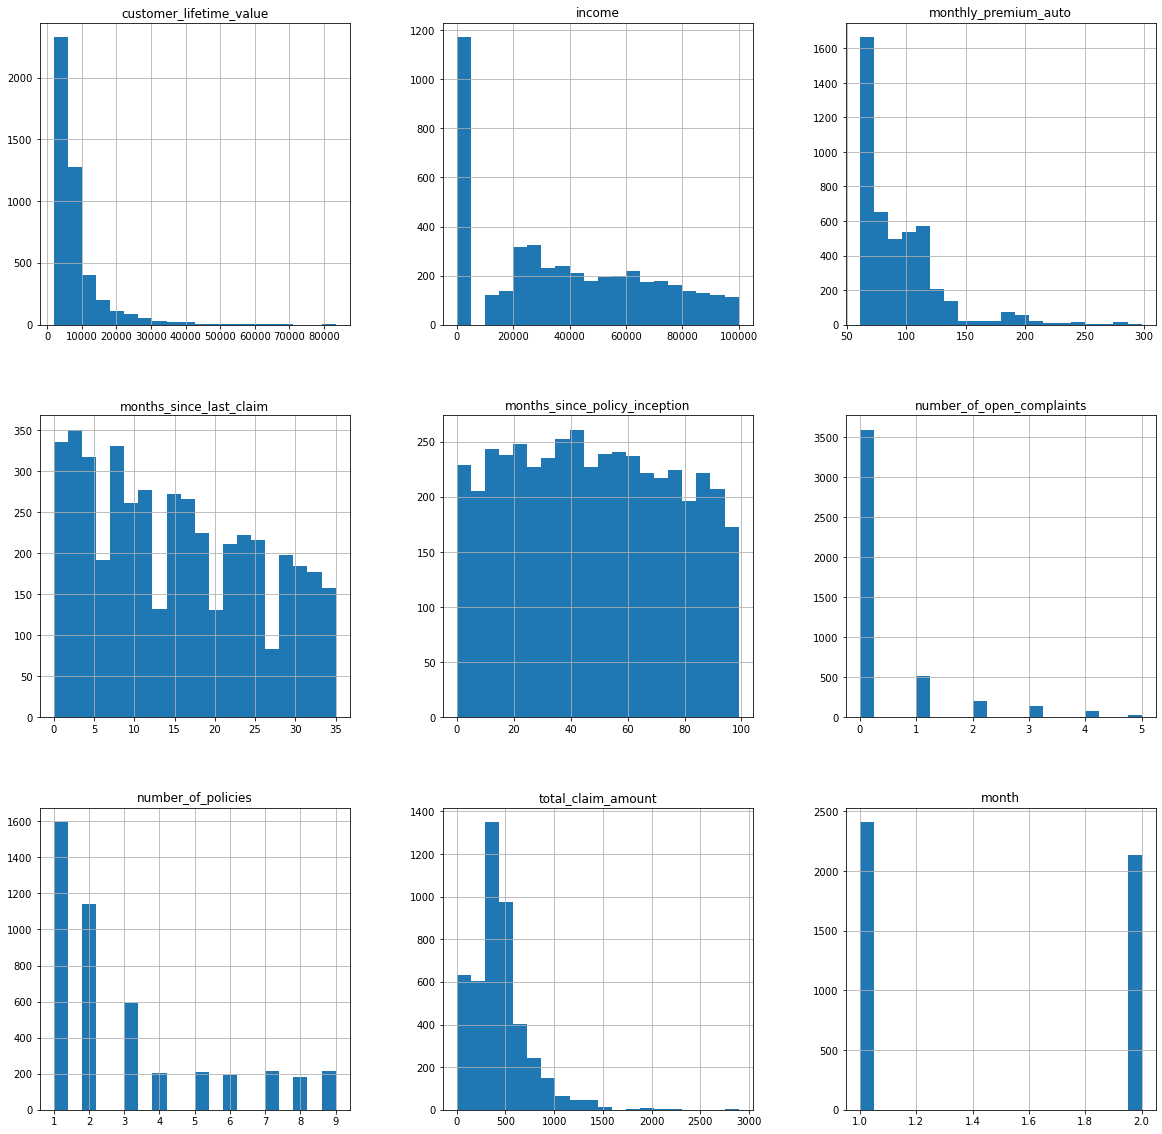

In [43]:
dfnum.hist(bins=20,figsize=(20,20));

<AxesSubplot:>

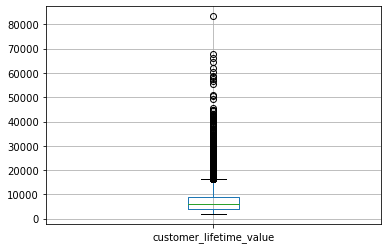

In [44]:
dfnum[['customer_lifetime_value']].boxplot()

<AxesSubplot:>

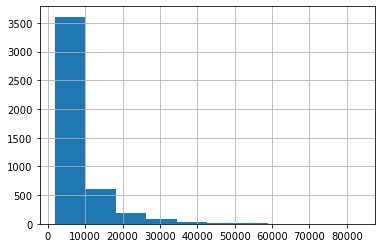

In [45]:
dfnum['customer_lifetime_value'].hist()

In [46]:
iqr=np.percentile(dfnum['customer_lifetime_value'],75)-np.percentile(dfnum['customer_lifetime_value'],25)

In [47]:
iqr

4897.507035499999

In [48]:
upper_limit= np.percentile(dfnum['customer_lifetime_value'],75)+ 1.5*iqr

In [49]:
upper_limit

16282.857491249997

In [50]:
lower_limit= np.percentile(dfnum['customer_lifetime_value'],25)- 1.5*iqr

In [51]:
lower_limit

-3307.1706507499985

In [52]:
df=df[(df['customer_lifetime_value']>lower_limit)&(df['customer_lifetime_value']<=upper_limit)]

In [53]:
df.reset_index(drop=True, inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       4140 non-null   object        
 1   state                          4140 non-null   object        
 2   customer_lifetime_value        4140 non-null   float64       
 3   response                       4140 non-null   object        
 4   coverage                       4140 non-null   object        
 5   education                      4140 non-null   object        
 6   effective_to_date              4140 non-null   datetime64[ns]
 7   employmentstatus               4140 non-null   object        
 8   gender                         4140 non-null   object        
 9   income                         4140 non-null   float64       
 10  location_code                  4140 non-null   object        
 11  marital_status   

<AxesSubplot:>

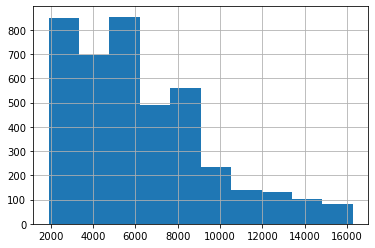

In [55]:
df['customer_lifetime_value'].hist()

<AxesSubplot:>

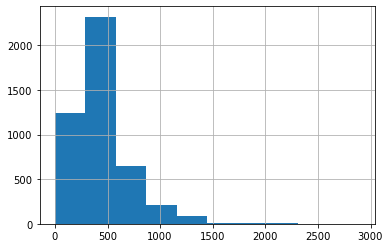

In [56]:
dfnum['total_claim_amount'].hist()

In [57]:
iqr=np.percentile(dfnum['total_claim_amount'],75)-np.percentile(dfnum['total_claim_amount'],25)

In [58]:
upper_limit= np.percentile(dfnum['total_claim_amount'],75)+ 1.5*iqr

In [59]:
lower_limit= np.percentile(dfnum['total_claim_amount'],25)- 1.5*iqr

In [60]:
df=df[(df['total_claim_amount']>lower_limit)&(df['total_claim_amount']<=upper_limit)]

In [61]:
df.reset_index(drop=True, inplace=True)

<AxesSubplot:>

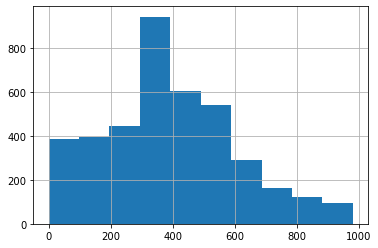

In [62]:
df['total_claim_amount'].hist()

In [63]:
y = df['total_claim_amount']

In [64]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       3980 non-null   object        
 1   state                          3980 non-null   object        
 2   customer_lifetime_value        3980 non-null   float64       
 3   response                       3980 non-null   object        
 4   coverage                       3980 non-null   object        
 5   education                      3980 non-null   object        
 6   effective_to_date              3980 non-null   datetime64[ns]
 7   employmentstatus               3980 non-null   object        
 8   gender                         3980 non-null   object        
 9   income                         3980 non-null   float64       
 10  location_code                  3980 non-null   object        
 11  marital_status   

In [65]:
df=df.drop(['total_claim_amount'], axis = 1)

In [66]:
dfnum=df.select_dtypes(include=np.number)
dfnum

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,14947.917300,22139.0,100.0,34.0,31.0,0.0,2.0,2
1,5154.764074,82730.0,127.0,13.0,31.0,0.0,1.0,1
2,5454.587929,66334.0,69.0,25.0,25.0,0.0,4.0,1
3,5326.677654,76717.0,66.0,26.0,10.0,0.0,6.0,2
4,2497.531509,0.0,69.0,5.0,74.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...
3975,8610.667489,0.0,111.0,27.0,36.0,0.0,9.0,2
3976,3579.023825,28304.0,91.0,10.0,30.0,2.0,1.0,1
3977,2771.663013,59855.0,74.0,30.0,82.0,4.0,1.0,1
3978,5259.444853,61146.0,65.0,7.0,68.0,0.0,6.0,1


In [67]:
dfcat=df.select_dtypes(include=object)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dfnum)
StandardScaler()
scaled=scaler.transform(dfnum)

In [69]:
scaleddf=pd.DataFrame(scaled)
scaleddf

,0,1,2,3,4,5,6,7
0,2.769864,-0.533967,0.450761,1.883359,-0.606241,-0.427577,-0.427665,1.055827
1,-0.325673,1.464477,1.487108,-0.197615,-0.606241,-0.427577,-0.833412,-0.947124
2,-0.230901,0.923696,-0.739118,0.991513,-0.819748,-0.427577,0.383828,-0.947124
3,-0.271332,1.266153,-0.854267,1.090607,-1.353516,-0.427577,1.195321,1.055827
4,-1.165603,-1.264168,-0.739118,-0.990367,0.923891,-0.427577,-0.833412,-0.947124
...,...,...,...,...,...,...,...,...
3975,0.766710,-1.264168,0.872977,1.189701,-0.428319,-0.427577,2.412561,1.055827
3976,-0.823752,-0.330630,0.105313,-0.494897,-0.641826,1.754163,-0.833412,-0.947124
3977,-1.078952,0.710002,-0.547202,1.486983,1.208567,3.935904,-0.833412,-0.947124
3978,-0.292584,0.752582,-0.892650,-0.792179,0.710384,-0.427577,1.195321,-0.947124


In [70]:
dfcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          3980 non-null   object
 1   state             3980 non-null   object
 2   response          3980 non-null   object
 3   coverage          3980 non-null   object
 4   education         3980 non-null   object
 5   employmentstatus  3980 non-null   object
 6   gender            3980 non-null   object
 7   location_code     3980 non-null   object
 8   marital_status    3980 non-null   object
 9   policy_type       3980 non-null   object
 10  policy            3980 non-null   object
 11  renew_offer_type  3980 non-null   object
 12  sales_channel     3980 non-null   object
 13  vehicle_class     3980 non-null   object
 14  vehicle_size      3980 non-null   object
 15  vehicle_type      3980 non-null   object
dtypes: object(16)
memory usage: 497.6+ KB


In [71]:
dfcat

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
1,HG93801,Arizona,No,Extended,High School or Below,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
2,KR82385,California,No,Basic,Master,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
3,FH51383,California,No,Basic,High School or Below,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A
4,TR26615,Oregon,No,Basic,High School or Below,Unemployed,M,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Two-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,WU60905,California,No,Basic,High School or Below,Unemployed,F,Suburban,Married,Corporate Auto,Corporate L1,Offer3,Web,SUV,Medsize,A
3976,PP30874,California,No,Extended,High School or Below,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A
3977,SU71163,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
3978,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A


In [72]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error').fit(dfcat)
ohe = encoder.transform(dfcat).toarray()

In [73]:
ohedf=pd.DataFrame(ohe)
ohedf

,0,1,2,3,4,5,6,7,8,9,...,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [74]:
newdata=pd.concat([ohedf,scaleddf],axis=1)
newdata.head()

,0,1,2,3,4,5,6,7,8,9,...,4036,4037,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.769864,-0.533967,0.450761,1.883359,-0.606241,-0.427577,-0.427665,1.055827
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.325673,1.464477,1.487108,-0.197615,-0.606241,-0.427577,-0.833412,-0.947124
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.230901,0.923696,-0.739118,0.991513,-0.819748,-0.427577,0.383828,-0.947124
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.271332,1.266153,-0.854267,1.090607,-1.353516,-0.427577,1.195321,1.055827
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.165603,-1.264168,-0.739118,-0.990367,0.923891,-0.427577,-0.833412,-0.947124


In [189]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(newdata,y, test_size=0.4, random_state=37)

In [190]:
X_train.shape

(2388, 4046)

In [191]:
y_train.shape

(2388,)

In [192]:
X_test.shape

(1592, 4046)

In [193]:
y_test.shape

(1592,)

In [194]:
from sklearn import linear_model 
from sklearn.metrics import r2_score, mean_squared_error

In [195]:
lm=linear_model.LinearRegression()

In [196]:
model=lm.fit(X_train,y_train)
predictions=lm.predict(X_test)


In [197]:
predictions

array([659.06088601, 378.99380572, 621.25459215, ..., 545.95145563,
       481.32806427, 505.94121614])

In [198]:
r2_score(y_test,predictions)

0.7888298484934938

In [157]:
mean_squared_error(y_test,predictions)

10617.972323895408

- R-squared (R2), which is the proportion of variation in the outcome that is explained by the predictor variables. The Higher the R-squared, the better the model.
R2= 0.78 Not too bad 

- Root Mean Squared Error (RMSE), which measures the average error performed by the model in predicting the outcome for an observation. The lower the RMSE, the better the model.
RMSE= 10685